In [1]:
from tensorflow import keras
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign")

100%|██████████| 325M/325M [00:15<00:00, 21.6MB/s]


In [4]:
dataset_train = "/content/skin-cancer-malignant-vs-benign/train" #dataset_train ---> represent variable that stores the path to the train directory
import pathlib #pathlib --> to create a Path object called dataset_train
dataset_train = pathlib.Path(dataset_train)

In [5]:
print(dataset_train)

/content/skin-cancer-malignant-vs-benign/train


/content/skin-cancer-malignant-vs-benign/train/benign/978.jpg


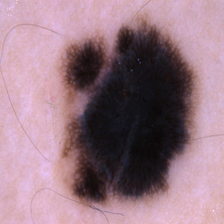

In [6]:
benign = list(dataset_train.glob('benign/*')) #view a sample from a benign,list(dataset_train.glob('benign/*'))--->  to create a list of all the files in the benign directory of the dataset_train object, glob --> method is used to find all the pathnames matching a specified pattern
print(benign[0]) #index of the picture
PIL.Image.open(str(benign[0])) #Image.open --> func to open the picture

/content/skin-cancer-malignant-vs-benign/train/malignant/978.jpg


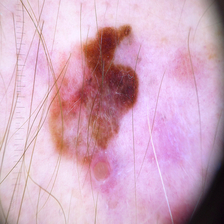

In [7]:
#view a sample from a malignant, list(dataset_train.glob('malignant/*'))--->  to create a list of all the files in the malignant directory of the dataset_train object, glob --> method is used to find all the pathnames matching a specified pattern
malignant = list(dataset_train.glob('malignant/*'))
print(malignant[0]) #index of the picture
PIL.Image.open(str(malignant[0])) #Image.open --> func to open the picture

In [8]:
img_height, img_width = 80, 80 #reshape pictures from 180*180*3 to 80*80*3
batch_size = 32
data_dir = r"/content/skin-cancer-malignant-vs-benign/train" ## path of file

#image_dataset_from_directory --> func to read and deal with data, seed --> command to link between training and validation and divide the ratio of the same training file, subset --> to make the train_ds represent percentage of training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
  validation_split=0.2,
  subset = "training",
  seed = 123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=None)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [9]:
img_height, img_width = 80, 80 #reshape pictures from 180*180*3 to 80*80*3
batch_size = 32

#image_dataset_from_directory --> func to read and deal with data, seed --> command to link between training and validation and divide the ratio of the same training file, subset --> to make the train_ds represent percentage of validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
  validation_split=0.2,
  subset = "validation",
  seed = 123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size= None)

Found 2637 files belonging to 2 classes.
Using 527 files for validation.


In [10]:
#create two empty lists x_train and y_train
x_train = []
y_train = []
#loop through the train_ds where i --> represent images , j --> represent classes
for i, j in train_ds:
  #np.array() --> converts both lists to arrays
  x_train.append(np.array(i))
  y_train.append(np.array(j))
x_train = np.array(x_train).reshape(-1, 80, 80, 3)
y_train = np.array(y_train)

In [11]:
#creates two empty lists x_val and y_val
x_val = []
y_val = []
#loops through the train_ds where i --> represent images , j --> represent classes
for a,  b in val_ds:
  #np.array() --> converts both lists to arrays
  x_val.append(np.array(a))
  y_val.append(np.array(b))
x_val= np.array(x_val).reshape(-1, 80, 80, 3)
y_val= np.array(y_val)

In [12]:
#concatination
x_train = np.concatenate((x_train,x_val), axis=0) ## between x_train & x_val
y_train = np.concatenate((y_train,y_val), axis=0) ## between y_train & y_val

In [13]:
#building layers of autoencoder
#enoder layers from encoded0 to ... encoded2
#button_neck --> encoded3
#decoder layers from  decoded0 to ..decoded3
button_neck=256
#x=392
input_img=keras.Input(shape=(19200,))
#in encoded0 layer ---> takes input = 19200 --> represent output the layer before it
#this is how the rest of yhe layers work , taking their input from the layer that before it
encoded0= layers.Dense(6400 , activation='relu')(input_img)
encoded1= layers.Dense(2134 , activation='relu')(encoded0)
encoded2= layers.Dense(711, activation='relu')(encoded1)
encoded3= layers.Dense(button_neck , activation='relu')(encoded1)
decoded0=layers.Dense(711, activation='relu')(encoded3)
decoded1= layers.Dense(2134 , activation='relu')(decoded0)
decoded2= layers.Dense(6400, activation='relu')(decoded1)
decoded3= layers.Dense(19200, activation='sigmoid')(decoded2)

In [14]:
#to create model of autoencoder and to connect its layers
#input_img  --> represents the first layers in autoencoder
#decoded3 --> represents the last layers in autoencoder
autoencoder= keras.Model(input_img , decoded3)

In [15]:
#dataset_test ---> represent variable that stores the path to the test directory
dataset_test = "/content/skin-cancer-malignant-vs-benign/test"
#pathlib --> to create a Path object called dataset_test
import pathlib
dataset_test = pathlib.Path(dataset_test)

In [16]:
img_height, img_width = 80, 80 ## reshape pictures from 180*180*3 to 80*80*3
batch_size = 32
data_dir = r"/content/skin-cancer-malignant-vs-benign/test" ## path of file

#image_dataset_from_directory --> func to read and deal with data
#seed --> command to link between test and validation and divide the ratio of the same test file
#subset --> to make the train_ds represent percentage of test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
  validation_split=0.2,
  subset = "training",
  seed = 125,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=None)

Found 660 files belonging to 2 classes.
Using 528 files for training.


In [17]:
img_height, img_width = 80, 80  #reshape pictures from 180*180*3 to 80*80*3
batch_size = 32

#image_dataset_from_directory --> func to read and deal with data
#seed --> command to link between test and validation and divide the ratio of the same test file
#subset --> to make the train_ds represent percentage of test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
  validation_split=0.2,
  subset = "validation",
  seed = 125,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=None)

Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [18]:
#creates two empty lists x_test and y_test
import numpy as np
x_test = []
y_test = []
#loops through the train_ds where fc --> represent images , e --> represent classes
for f, e in test_ds:
  #np.array() --> converts both lists to arrays
  x_test.append(np.array(f))
  y_test.append(np.array(e))
x_test = np.array(x_test).reshape(-1, 80, 80, 3)
y_test= np.array(y_test)

In [19]:
#creates two empty lists x_val and y_val
x_tt_val = []
y_tt_val = []
#loops through the train_ds where a --> represent images , b --> represent classes
for a,  b in val_ds:
  #np.array() --> converts both lists to arrays
  x_tt_val.append(np.array(a))
  y_tt_val.append(np.array(b))
x_tt_val= np.array(x_val).reshape(-1, 80, 80, 3)
y_tt_val= np.array(y_val)

In [20]:
#concatination
x_test= np.concatenate((x_test,x_tt_val), axis=0) ## between x_test & x_tt_val
y_test = np.concatenate((y_test,y_tt_val), axis=0) ## between y_test & y_tt_val

In [21]:
#converts the x_train and x_test arrays to float32 data type and normalize the pixels by dividing them by 255 to the range of 0 to 1
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255
#reshapes the x_train and x_test arrays into 2D arrays with dimensions
#np.prod -->  to calculate the product of the image dimensions
x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [22]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train , epochs=5 , batch_size=5 ,validation_data= (x_test, x_test))

Epoch 1/5
528/528 [==============================] - 39s 58ms/step - loss: 0.6400 - accuracy: 0.0042 - val_loss: 0.6318 - val_accuracy: 0.0106
Epoch 2/5
528/528 [==============================] - 31s 58ms/step - loss: 0.6296 - accuracy: 0.0046 - val_loss: 0.6240 - val_accuracy: 0.0000e+00
Epoch 3/5
528/528 [==============================] - 30s 58ms/step - loss: 0.6218 - accuracy: 0.0019 - val_loss: 0.6175 - val_accuracy: 0.0015
Epoch 4/5
528/528 [==============================] - 30s 58ms/step - loss: 0.6148 - accuracy: 0.0064 - val_loss: 0.6133 - val_accuracy: 0.0030
Epoch 5/5
528/528 [==============================] - 30s 57ms/step - loss: 0.6125 - accuracy: 0.0034 - val_loss: 0.6112 - val_accuracy: 0.0015


In [23]:
#to create model to encoder from input_img_layer to  encoded3_layer
encoder = keras.Model(input_img , encoded3)

In [24]:
#to create model to decoder
encoded_input= keras.Input(shape = (button_neck))
decoder_layer = autoencoder.layers[-4](encoded_input)
decoder_layer1 = autoencoder.layers[-3](decoder_layer)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoder_layer3 = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer3(decoder_layer2))

In [25]:
encoded_images = encoder.predict(x_test)
decoded_imgs =decoder.predict(encoded_images)

21/21 [==============================] - 0s 4ms/step


In [26]:
encoded_images2 = encoder.predict(x_train)
decoded_imgs2 =decoder.predict(encoded_images2)

83/83 [==============================] - 0s 3ms/step


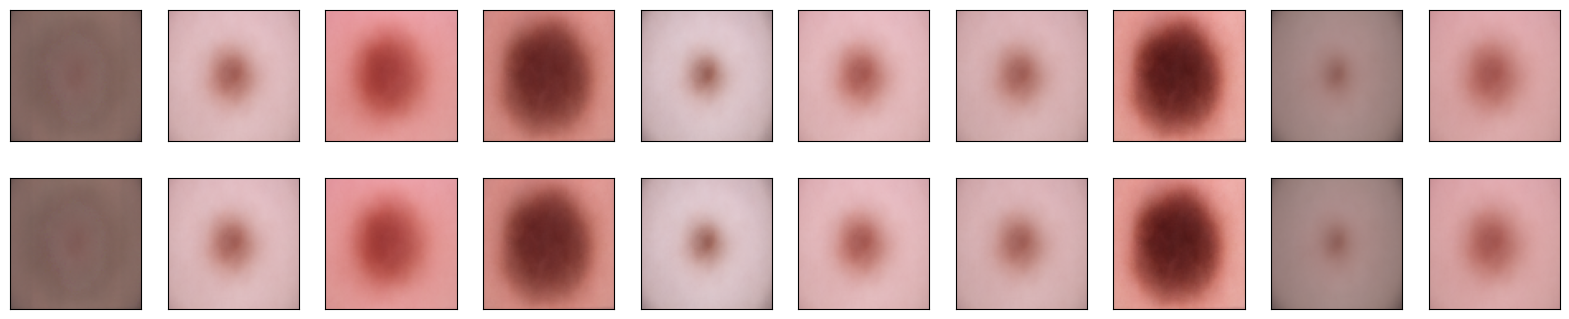

In [42]:
import matplotlib.pyplot as plt
#plt.figure --> creates a figure with dimensions (20, 4)
#loops through the first n=10
#imshow --->  displays the image
n =10
plt.figure(figsize=(20,4))
for i in range(n):
 ax= plt.subplot(2, n , i+1)
 plt.imshow(x_test[i].reshape(80,80,3))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)


 ax= plt.subplot(2, n , i+1+n)
 plt.imshow(decoded_imgs[i].reshape(80,80,3))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)

plt.show()


In [28]:
#Define the classification model
classifier_input = keras.Input(shape=(19200,))
classifier_layer1 = keras.layers.Dense(512, activation='relu')(classifier_input)
classifier_layer2 = keras.layers.Dense(256, activation='relu')(classifier_layer1)
classifier_layer3 = keras.layers.Dense(64, activation='relu')(classifier_layer2)
classifier_layer4 = keras.layers.Dense(16, activation='relu')(classifier_layer3)
classifier_layer5 = keras.layers.Dense(2, activation='softmax')(classifier_layer4)
classifier_model = keras.Model(classifier_input, classifier_layer5)

Compile & fit the classifier_model

In [29]:
classifier_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
results=classifier_model.fit(
    x=decoded_imgs2 ,
    y=y_train,
    epochs=5,
    shuffle=True,
    batch_size=20
)

Epoch 1/5
132/132 [==============================] - 2s 5ms/step - loss: 0.6835 - accuracy: 0.5643
Epoch 2/5
132/132 [==============================] - 1s 5ms/step - loss: 0.6627 - accuracy: 0.6105
Epoch 3/5
132/132 [==============================] - 1s 5ms/step - loss: 0.6529 - accuracy: 0.6299
Epoch 4/5
132/132 [==============================] - 1s 5ms/step - loss: 0.6424 - accuracy: 0.6462
Epoch 5/5
132/132 [==============================] - 1s 5ms/step - loss: 0.6380 - accuracy: 0.6595


In [31]:
#Define the classification model
classifier_input = keras.Input(shape=(button_neck,))
classifier_layer1 = keras.layers.Dense(16, activation='relu')(classifier_input)
classifier_layer2 = keras.layers.Dense(2, activation='softmax')(classifier_layer1)
classifier_model = keras.Model(classifier_input, classifier_layer2)

In [32]:
#Combine the models into a single model
combined_input = keras.Input(shape=(19200,))
autoencoder_output = autoencoder(combined_input)
bottleneck_output =encoder(combined_input)
classifier_output = classifier_model(bottleneck_output)
combined_model = keras.Model(combined_input, classifier_output)

In [33]:
#Compile the combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
#Train the combined model
combined_model.fit(x_train, y_train,
                   epochs=5,
                   batch_size=20,
                   shuffle=True,
                   validation_data=(x_test, y_test))

Epoch 1/5
132/132 [==============================] - 6s 32ms/step - loss: 0.6488 - accuracy: 0.6333 - val_loss: 0.6128 - val_accuracy: 0.6844
Epoch 2/5
132/132 [==============================] - 4s 29ms/step - loss: 0.5922 - accuracy: 0.6845 - val_loss: 0.5603 - val_accuracy: 0.7253
Epoch 3/5
132/132 [==============================] - 4s 29ms/step - loss: 0.5272 - accuracy: 0.7330 - val_loss: 0.5326 - val_accuracy: 0.7056
Epoch 4/5
132/132 [==============================] - 4s 30ms/step - loss: 0.4942 - accuracy: 0.7543 - val_loss: 0.4231 - val_accuracy: 0.7724
Epoch 5/5
132/132 [==============================] - 4s 29ms/step - loss: 0.4573 - accuracy: 0.7687 - val_loss: 0.4672 - val_accuracy: 0.7663


In [35]:
#rehape decoded_imgs2 & decoded_imgs
x_train= decoded_imgs2.reshape(-1,80,80,3)

In [36]:
x_test= decoded_imgs.reshape(-1,80,80,3)

In [37]:
from keras.api._v2.keras import activations
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten,AvgPool2D


#building cnn
model = keras.Sequential()
model.add(Input(shape=(80,80,3)))
model.add(Conv2D(filters=6,kernel_size=5,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=16,kernel_size=5,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1),strides=(1,1),padding='valid'))
model.add(layers.Dropout(0.3))

model.add(Conv2D(filters=16,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(AvgPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [38]:
#compile and fit
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
results=model.fit(
    x=x_train,
    y=y_train,
    shuffle=True,
    epochs=5,
    batch_size=20
)

Epoch 1/5
132/132 [==============================] - 9s 8ms/step - loss: 0.6887 - accuracy: 0.5411
Epoch 2/5
132/132 [==============================] - 1s 6ms/step - loss: 0.6896 - accuracy: 0.5461
Epoch 3/5
132/132 [==============================] - 1s 5ms/step - loss: 0.6892 - accuracy: 0.5461
Epoch 4/5
132/132 [==============================] - 1s 6ms/step - loss: 0.6894 - accuracy: 0.5461
Epoch 5/5
132/132 [==============================] - 1s 6ms/step - loss: 0.6897 - accuracy: 0.5461


In [39]:
#ResNet50 ---> pre-trained model
#include_top=False ---> to can enter my input_shape
#weights='imagenet' --> to load the pre-trained weights for the model.
#for loops ---> weights will not be updated during training.
pretrained_model = tf.keras.applications.ResNet50(
  include_top=False,
  input_shape = (80, 80, 3),
  pooling='avg',
  classes=2,
  weights='imagenet')
for i in pretrained_model.layers:
  i.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [40]:
resnet_model = Sequential()
resnet_model.add(pretrained_model) ### to use pre-trained model
resnet_model.add(Flatten()) ## to convert 1D array
resnet_model.add(Dense(64, activation = 'relu'))
resnet_model.add(Dense(2, activation = 'softmax'))


In [41]:
#compile & fit
resnet_model.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = resnet_model.fit(x_train, y_train , validation_data =(x_test , y_test), epochs = 5)

Epoch 1/5
83/83 [==============================] - 12s 56ms/step - loss: 0.6917 - accuracy: 0.5449 - val_loss: 0.7142 - val_accuracy: 0.5524
Epoch 2/5
83/83 [==============================] - 2s 29ms/step - loss: 0.6785 - accuracy: 0.5666 - val_loss: 0.6606 - val_accuracy: 0.5630
Epoch 3/5
83/83 [==============================] - 2s 29ms/step - loss: 0.6729 - accuracy: 0.5920 - val_loss: 0.6510 - val_accuracy: 0.6525
Epoch 4/5
83/83 [==============================] - 2s 27ms/step - loss: 0.6691 - accuracy: 0.5893 - val_loss: 0.6497 - val_accuracy: 0.6282
Epoch 5/5
83/83 [==============================] - 3s 31ms/step - loss: 0.6556 - accuracy: 0.6284 - val_loss: 0.6496 - val_accuracy: 0.5797
